[[ 99 101 103 ...  87  89  90]
 [ 99 101 103 ...  85  87  88]
 [ 99 101 103 ...  82  83  84]
 ...
 [ 40  42  41 ...  60  62  64]
 [ 40  42  41 ...  61  64  65]
 [ 41  43  41 ...  62  64  66]]


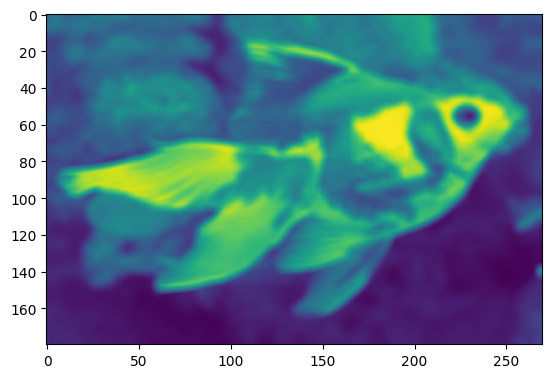

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('new/a.jpg', mode='F')
k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imwrite('bird_mean_filter.png', b)
print(b)
plt.imshow(b)
plt.show()


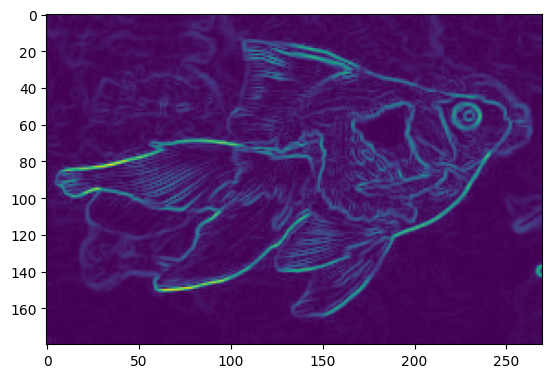

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
a = iio.imread('new/a.jpg', mode='F')
b = filters.prewitt(a).astype(np.uint8)
iio.imsave('bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()


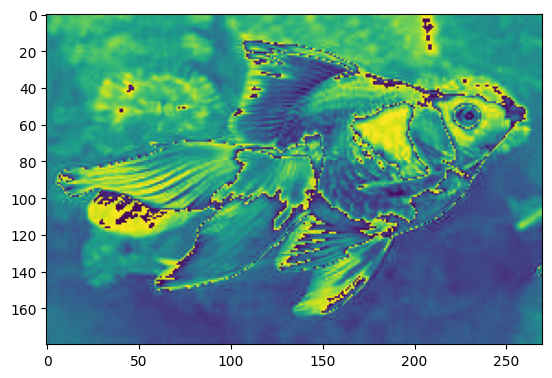

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('new/a.jpg')
bdata = (data[:,:,1] + data[:,:,2])
iio.imwrite('new/a.ranom.jpg', bdata)
plt.imshow(bdata)
plt.show()


In [3]:
import cv2
import numpy as np
import random

# Load 3 images
image_names = ["new/image1.jpg", "new/image2.jpg", "new/image3.jpg"]
images = [cv2.imread(name, cv2.IMREAD_COLOR) for name in image_names]

# Check for image load success
if any(img is None for img in images):
    print("❌ Một hoặc nhiều ảnh không thể đọc được. Kiểm tra lại tên file.")
    exit()

# Resize images for better display
images = [cv2.resize(img, (300, 300)) for img in images]

# ------------------- Biến đổi ảnh -------------------

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=None):
    if gamma is None:
        gamma = random.uniform(0.5, 2.0)
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img, c=None):
    if c is None:
        c = random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    log_img = c * np.log1p(img_float)
    log_img = np.clip(log_img * 255.0 / np.max(log_img), 0, 255)
    return log_img.astype(np.uint8)

def histogram_equalization(img):
    if len(img.shape) == 3:
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    else:
        return cv2.equalizeHist(img)

def contrast_stretching(img, min_val=None, max_val=None):
    if min_val is None:
        min_val = random.randint(0, 100)
    if max_val is None:
        max_val = random.randint(155, 255)
    img_float = img.astype(np.float32)
    stretched = (img_float - min_val) * (255.0 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255)
    return stretched.astype(np.uint8)

def adaptive_histogram_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    if len(img.shape) == 3:
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        lab[:, :, 0] = clahe.apply(lab[:, :, 0])
        return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    else:
        return clahe.apply(img)

# ------------------- Hiển thị Menu và Vòng lặp -------------------

def apply_transformation(key, images):
    if key == ord('I'):
        return [inverse_image(img) for img in images]
    elif key == ord('G'):
        return [gamma_correction(img) for img in images]
    elif key == ord('L'):
        return [log_transform(img) for img in images]
    elif key == ord('H'):
        return [histogram_equalization(img) for img in images]
    elif key == ord('C'):
        return [contrast_stretching(img) for img in images]
    elif key == ord('A'):
        return [adaptive_histogram_equalization(img) for img in images]
    else:
        return images

def display_images(images):
    combined = np.hstack(images)
    cv2.imshow("Ảnh Biến Đổi (I: Inverse, G: Gamma, L: Log, H: HistEQ, C: Contrast, A: CLAHE, Q: Quit)", combined)

# Main loop
while True:
    display_images(images)
    key = cv2.waitKey(0) & 0xFF
    if key == ord('Q'):
        break
    images = apply_transformation(key, images)

cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

# Đọc ảnh
img_fruits = cv2.imread("colorful-ripe-tropical-fruits.jpg")
img_quangninh = cv2.imread("thumuc/quang-ninh.jpg")
img_pagoda = cv2.imread("thumuc/pagoda.jpg")

# -------- 1. Tăng kích thước ảnh fruits thêm 30 pixel ở mỗi chiều ----------
new_width = img_fruits.shape[1] + 30
new_height = img_fruits.shape[0] + 30
resized_fruits = cv2.resize(img_fruits, (new_width, new_height))
cv2.imwrite("output_fruits_resized.jpg", resized_fruits)

# -------- 2. Xoay ảnh quang-ninh 45 độ và lật ngang ----------
(h, w) = img_quangninh.shape[:2]
center = (w // 2, h // 2)

# Ma trận xoay 45 độ theo chiều kim đồng hồ
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated_quangninh = cv2.warpAffine(img_quangninh, M, (w, h))

# Lật ngang (flip code = 1)
flipped_quangninh = cv2.flip(rotated_quangninh, 1)
cv2.imwrite("output_quangninh_rotated_flipped.jpg", flipped_quangninh)

# -------- 3. Phóng to ảnh pagoda 5 lần và làm mờ Gaussian ----------
upscaled_pagoda = cv2.resize(img_pagoda, (0, 0), fx=5, fy=5)
blurred_pagoda = cv2.GaussianBlur(upscaled_pagoda, (7, 7), 0)
cv2.imwrite("output_pagoda_upscaled_blurred.jpg", blurred_pagoda)

print("Xử lý hoàn tất. Các ảnh đầu ra đã được lưu.")


AttributeError: 'NoneType' object has no attribute 'shape'